# Introduction to python scikit-learn package

https://scikit-learn.org

    Simple and efficient tools for data mining and data analysis
    Accessible to everybody, and reusable in various contexts
    Built on NumPy, SciPy, and matplotlib
    Open source, commercially usable - BSD license

!pip3 install sklearn

!pip3 install --upgrade numpy

!pip3 install matplotlib

In [1]:
import sklearn
print(sklearn.__version__)
# https://scikit-learn.org/dev/versions.html

0.21.3


## Terminology for machine learning (ML) 

"Samples" (1, 2, 3, ..., n) to predict "Properties" (1, .., m)

Each sample is a multi-dimensional entry (x_1, x_2, x_3, ..., x_k), it said to have k "Attributes" or "Features".

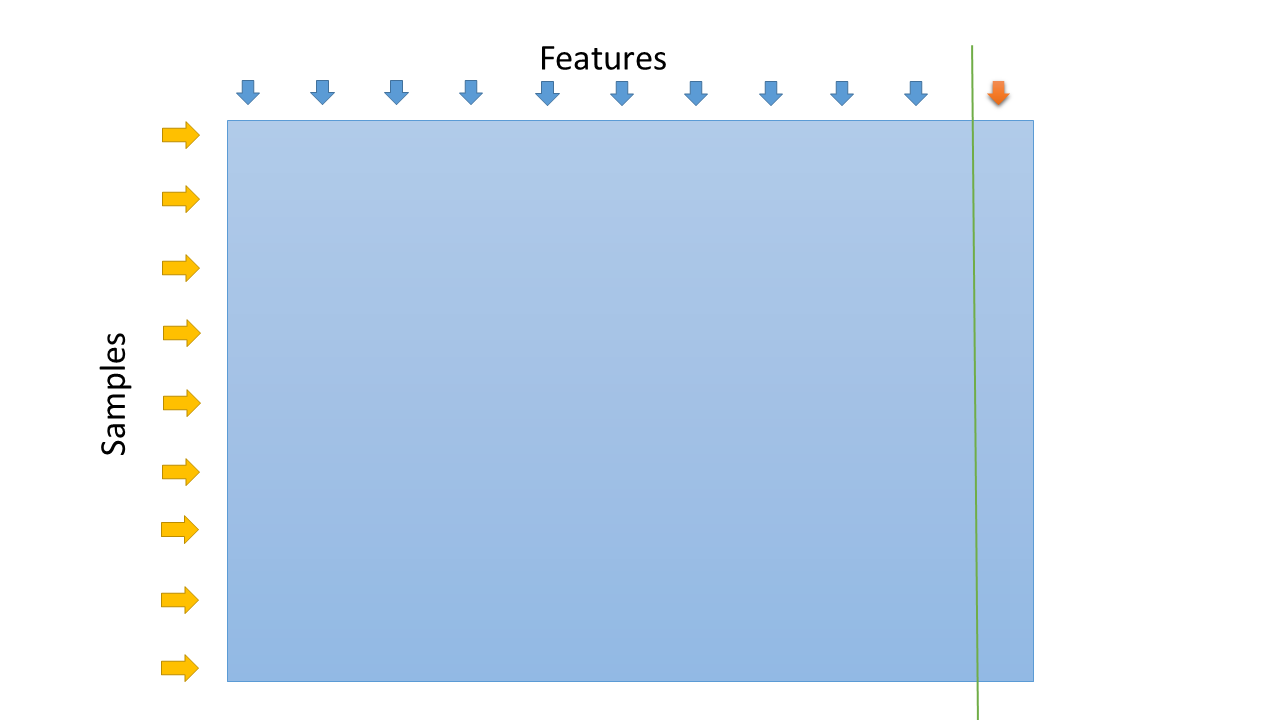

In [2]:
from IPython.display import Image
Image("image1.png", width="600")

## ML models:

### Supervised learning: learning with known labels
e.g. Classification and Regression
### Unsupervised learning: learning without labels
e.g. Clusetering


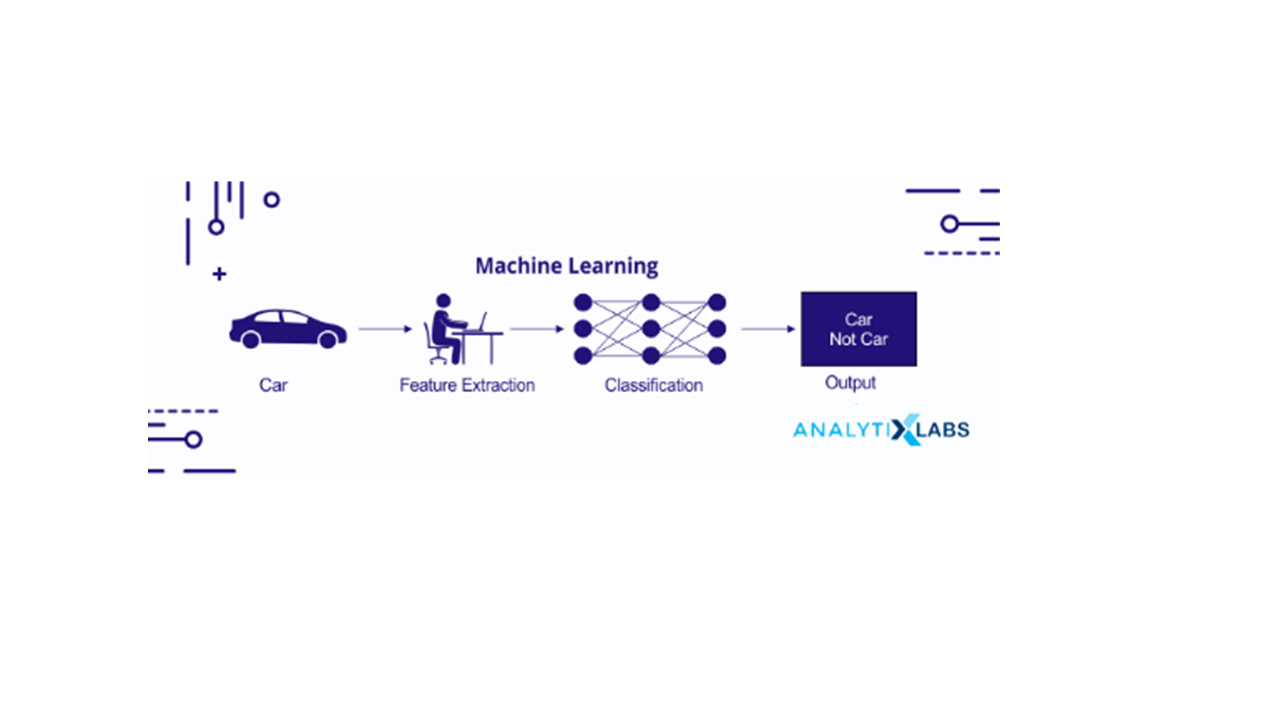

In [3]:
from IPython.display import Image
Image("image0.png", width="800")

# Hands-on
    *Section 1: Preprocess data
    Section 2: Build a model
    *Section 3: Model evaluation
    Section 4: Model Selection
## *Section 1: Preprocess data

### Loading data from csv file

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd

In [3]:
# Importing the dataset to a pandas DataFrame
dataset = pd.read_csv('http://scv.bu.edu/examples/python/ml_sklearn/Churn_Modelling.csv')


In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [6]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,9999.000000,9999.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9999.000000,10000.000000
mean,5000.50000,1.569094e+07,650.535654,38.921892,5.012800,76485.889288,1.530200,0.70550,0.515100,100096.406187,0.203700
std,2886.89568,7.193619e+04,96.655702,10.488327,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.062812,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51013.655000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100200.400000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149392.065000,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### X and Y from the dataset
    Supervised learning

In [10]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
X = dataset[  ['Geography', 'Age', 'EstimatedSalary']  ].to_numpy()
y = dataset['Exited'].to_numpy()

In [13]:
X[:5]

array([['France', 42.0, 101348.88],
       ['Spain', 41.0, 112542.58],
       ['France', 42.0, 113931.57],
       ['France', 39.0, 93826.63],
       ['Spain', 43.0, 79084.1]], dtype=object)

### Missing value

In [14]:
dataset[['Geography', 'Age', 'EstimatedSalary']].isnull().any(axis=0)

Geography          False
Age                 True
EstimatedSalary     True
dtype: bool

In [15]:
dataset[['Geography', 'Age', 'EstimatedSalary']].isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [16]:
dataset[dataset[['Geography', 'Age', 'EstimatedSalary']].isnull().any(axis=1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
24,25,15625047,Yen,846.0,France,Female,NaN,5,0.0,1,1,1,187616.16,0
27,28,15700772,Nebechi,571.0,France,Male,44.0,9,0.0,2,0,0,NaN,0


In [17]:
X[24]

array(['France', nan, 187616.16], dtype=object)

In [18]:
# Taking care of missing data with sklearn
#from sklearn.preprocessing import Imputer (older version)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()

X[:,1:3] = imputer.fit_transform(X[:,1:3])

#X[:,1:3] = imputer.transform(X[:,1:3])
X[24]

array(['France', 38.92189218921892, 187616.16], dtype=object)

In [20]:
X[27]

array(['France', 44.0, 100096.40618661867], dtype=object)

### We want to transform the categorical column (0)

We first make a copy of X

In [22]:
X_cp = X.copy()

So we have 3 unique values for the Geography: "France", "Germany" and "Spain".

In [23]:
# Encoding categorical data
# Encoding the Independent Variable

#from sklearn.preprocessing import LabelEncoder
# Encoding the first column of X
#labelencoder_X = LabelEncoder()
#X_cp[:,0] = labelencoder_X.fit_transform(X_cp[:,0])


from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()

X_cp_cat = onehotencoder.fit_transform(X_cp[:,0].reshape(-1, 1)).toarray()


In [24]:
X_cp_cat

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [25]:
X_cp=np.column_stack((X_cp_cat,X_cp[:,1:]))

In [26]:
X_cp[:5]

array([[1.0, 0.0, 0.0, 42.0, 101348.88],
       [0.0, 0.0, 1.0, 41.0, 112542.58],
       [1.0, 0.0, 0.0, 42.0, 113931.57],
       [1.0, 0.0, 0.0, 39.0, 93826.63],
       [0.0, 0.0, 1.0, 43.0, 79084.1]], dtype=object)

In [27]:
y

array([1, 0, 1, ..., 1, 1, 0])

### Training and Testing data split

    Build a model to learn from the data in the Training set and 

    Evaluate the model with the data in the testing set.

In [29]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_cp,y, test_size=1/5,
                                                 random_state = 0)
print(len(X_train))
print(len(X_test))

8000
2000


### Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[:,3:] = sc.fit_transform(X_train[:,3:])

X_test[:,3:] = sc.transform(X_test[:,3:])

In [31]:
X_train[:5]

array([[0.0, 0.0, 1.0, -0.4646191824680675, 1.1063773273394586],
       [0.0, 1.0, 0.0, 0.3010146678831418, -0.7488523381381627],
       [1.0, 0.0, 0.0, -0.9431403389375733, 1.485307608975629],
       [0.0, 0.0, 1.0, 0.10960620529533947, 1.276485668702639],
       [0.0, 0.0, 1.0, 1.7365781372916593, 0.5582846342674029]],
      dtype=object)

### BTW: sklearn provide standard example datasets
    https://scikit-learn.org/stable/datasets/index.html


from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
boston.data

## Section 2: Build a model
    https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [41]:
# e.g. Random Forest
# https://medium.com/@taplapinger/tuning-a-random-forest-classifier-1b252d1dde92
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state = 0)

In [36]:
#!pip3 install cmake
#!pip3 install --user xgboost
# Fitting XGBoost to the Training set
#from xgboost import XGBClassifier
#classifier = XGBClassifier()


In [47]:
# AutoML in python e.g. auto-sklearn
# on scc: 
# module load swig
# module load python3
# pip install --user auto-sklearn

#import autosklearn.classification

#classifier = autosklearn.classification.AutoSklearnClassifier()


In [42]:

classifier.fit(X_train, y_train)

# Predicting the Test set results


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [43]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

## *Section 3: Model evaluation 
https://towardsdatascience.com/accuracy-recall-precision-f-score-specificity-which-to-optimize-on-867d3f11124

In [44]:
# Making the Confusion Matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [45]:
cm

array([[1391,  204],
       [ 272,  133]])

[[TP = 1391, FP = 204],

 [FN = 272, TN = 133]]


### Accuracy = (TP+TN)/(TP+FP+FN+TN)
    Accuracy is a great measure but only when you have symmetric datasets (false negatives & false positives counts are close), also, false negatives & false positives have similar costs.

### Precision = TP/(TP+FP)
    Precision is how sure you are of your true positive. e.g. Of all the emails predicted to be spam, how many of those are 
    really spam?

### Recall (aka Sensitivity) = TP/(TP+FN)
    Recall is how sure you are that you are not missing any positives. e.g. Of all the people who are diabetic, how many 
    of those we correctly predict?

###  F1-Score (aka F-Score / F-Measure) = 2\*(Recall \* Precision) / (Recall + Precision)
    F1 is best if you have an uneven class distribution.
    It is the harmonic mean(average) of the precision and recall.
    F1 Score is best if there is some sort of balance between precision (p) & recall (r) in the system. 
    Oppositely F1 Score isn’t so high if one measure is improved at the expense of the other. 

#### https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

### Specificity = TN/(TN+FP)
    Choose Specificity if you want to cover all true negatives, meaning you don’t want any false alarms, you don’t want any false positives. (Drug test)

#### e.g. Example of Precision-Recall metric to evaluate classifier output quality.
https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

In [46]:
report = metrics.classification_report(y_test, y_pred)

In [47]:
report.split('\n')

['              precision    recall  f1-score   support',
 '',
 '           0       0.84      0.87      0.85      1595',
 '           1       0.39      0.33      0.36       405',
 '',
 '    accuracy                           0.76      2000',
 '   macro avg       0.62      0.60      0.61      2000',
 'weighted avg       0.75      0.76      0.75      2000',
 '']

## Section 4: Model Selection

### Cross validation


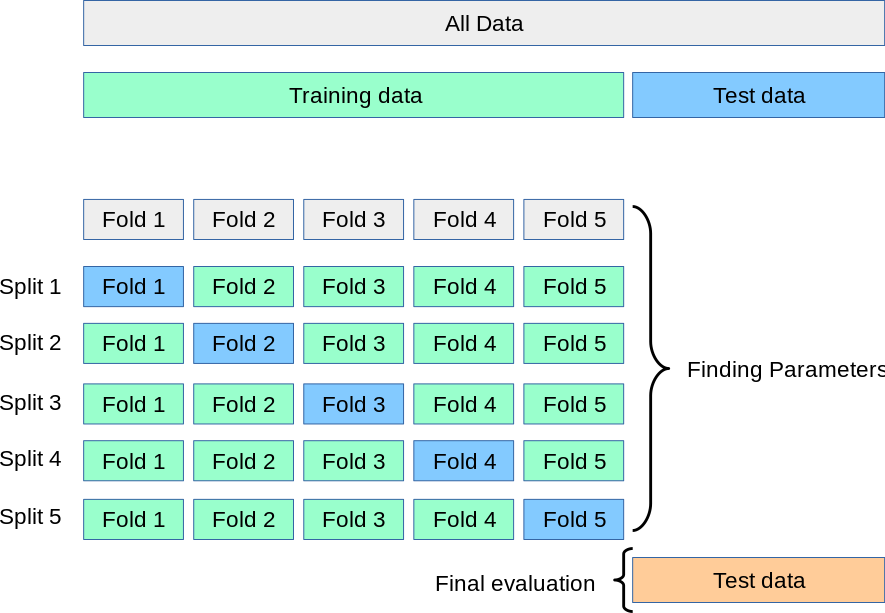

In [59]:
from IPython.display import Image
Image("grid_search_cross_validation.png",width=600)

In [48]:
# Applying k-fold cross validation
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
accuracies.mean()

0.7668792293034834

In [49]:
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2))

Accuracy: 0.77 (+/- 0.02)


### Grid search

In [50]:
#Applying grid search to find the best model and the best parameters

#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state = 0)


from sklearn.model_selection import GridSearchCV

parameters = [{'n_estimators': [5, 10, 15, 20], 'criterion': ['gini', 'entropy']}]
#parameters = [{'C':[1, 10, 100, 1000], 'kernel':['linear']},
#              {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.5, 0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.9]}
#        ]
GridSearchCV?
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1)
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


In [51]:
best_parameters

{'criterion': 'gini', 'n_estimators': 10}

In [52]:
best_accuracy

0.768875

In [53]:
grid_search.cv_results_

{'mean_fit_time': array([0.04596372, 0.08388383, 0.1179651 , 0.16408348, 0.08095508,
        0.14346662, 0.22062602, 0.28734229]),
 'std_fit_time': array([0.01043616, 0.00718925, 0.00577057, 0.00869405, 0.01357036,
        0.00215386, 0.01893089, 0.01241926]),
 'mean_score_time': array([0.00311916, 0.00406542, 0.00523176, 0.00683241, 0.00261314,
        0.00396099, 0.00599568, 0.00640819]),
 'std_score_time': array([0.00093126, 0.00034427, 0.00011249, 0.00058258, 0.00041821,
        0.00035096, 0.0023539 , 0.00020366]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[5, 10, 15, 20, 5, 10, 15, 20],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param

In [54]:
#!pip install --user scikit-optimize
from skopt import BayesSearchCV

opt = BayesSearchCV(
    classifier,
    {
        #'n_estimators': [5, 10, 15, 20], 
        'n_estimators': (5,20), # integer valued parameter
        'criterion': ['gini', 'entropy'], # categorical parameter
    },
    n_iter=60,
    cv=10
)

In [55]:
opt.total_iterations

120

In [56]:
opt.fit(X_train, y_train)

/usr1/scv/shwei/.local/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr1/scv/shwei/.local/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr1/scv/shwei/.local/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr1/scv/shwei/.local/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr1/scv/shwei/.local/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The object

/usr1/scv/shwei/.local/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BayesSearchCV(cv=10, error_score='raise',
              estimator=RandomForestClassifier(bootstrap=True,
                                               class_weight=None,
                                               criterion='entropy',
                                               max_depth=None,
                                               max_features='auto',
                                               max_leaf_nodes=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               n_estimators=10, n_jobs=None,
                                               oob_score=False, random_state=0,
                                               

In [115]:
print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))

val. score: 0.774625
test score: 0.762


In [116]:
opt.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Plotting learning curve with cross validation
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

## Finally, models and model visualization
Please checkout our data visualization tutorials using matplotlib and seaborn packages.

Automatically created module for IPython interactive environment


/share/pkg.7/python3/3.6.9/install/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/share/pkg.7/python3/3.6.9/install/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/share/pkg.7/python3/3.6.9/install/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


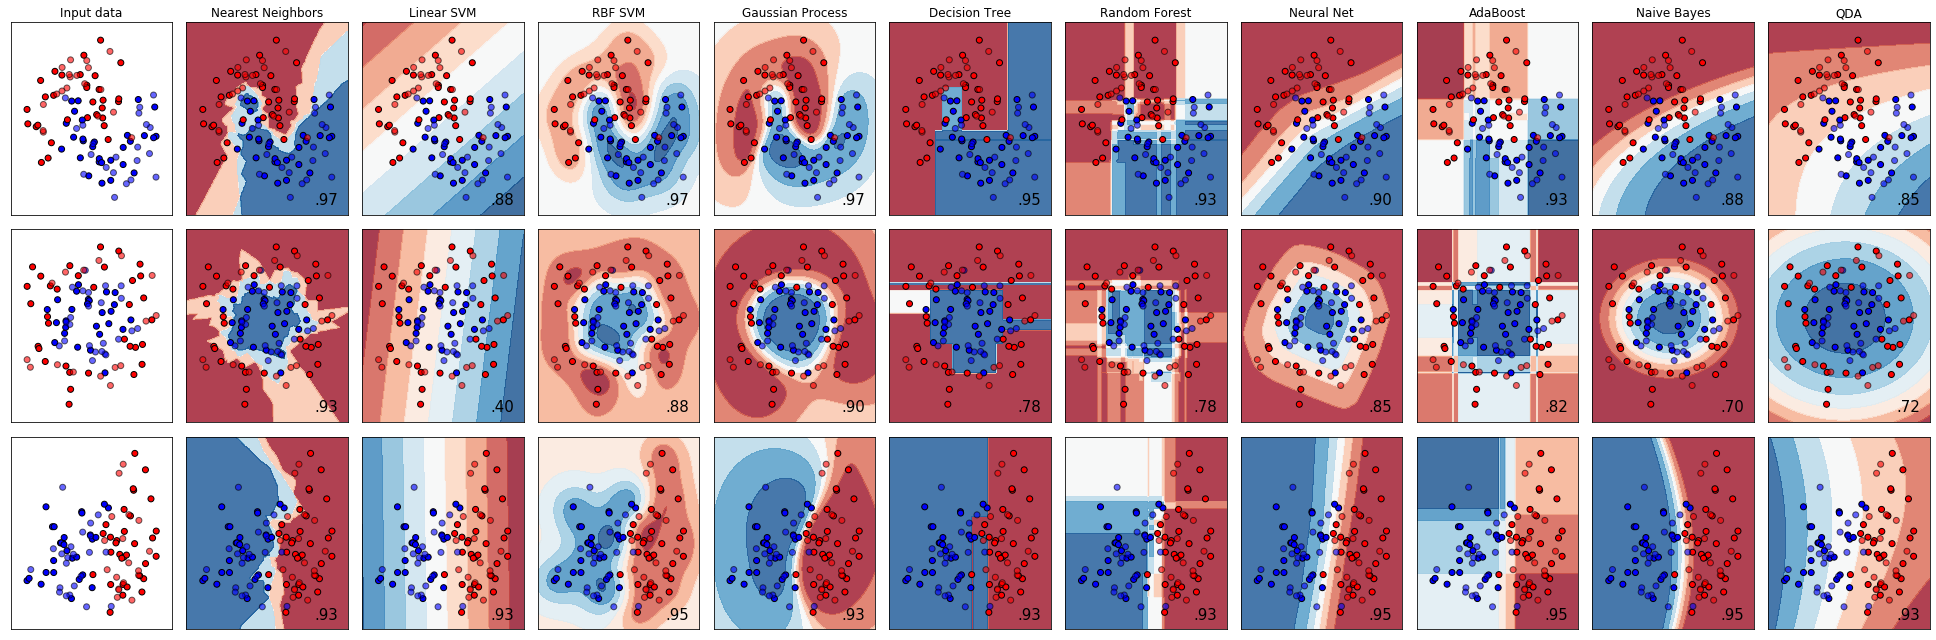

In [70]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh
################################################################################
# classifiers:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
################################################################################
# Datasets:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
################################################################################
# Training and plotting:

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
help@scc.bu.edu